In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split

In [3]:
train_data = pd.read_csv('image_train_data.csv')
test_data = pd.read_csv('image_test_data.csv')

In [4]:
train_data.head()

,id,image,label,deep_features,image_array
0,24,Height: 32 Width: 32,bird,[0.242872 1.09545 0 0.39363 0 0 11.8949 0 0 0 ...,[73 77 58 71 68 50 77 69 44 120 116 83 125 120...
1,33,Height: 32 Width: 32,cat,[0.525088 0 0 0 0 0 9.94829 0 0 0 0 0 1.01264 ...,[7 5 8 7 5 8 5 4 6 7 4 7 11 5 9 11 5 9 17 11 1...
2,36,Height: 32 Width: 32,cat,[0.566016 0 0 0 0 0 9.9972 0 0 0 1.38345 0 0.7...,[169 122 65 131 108 75 193 196 192 218 221 222...
3,70,Height: 32 Width: 32,dog,[1.1298 0 0 0.778194 0 0.758051 9.83053 0 0 0....,[154 179 152 159 183 157 165 189 162 174 199 1...
4,90,Height: 32 Width: 32,bird,[1.71787 0 0 0 0 0 9.33936 0 0 0 0 0 0.412137 ...,[216 195 180 201 178 160 210 184 164 212 188 1...


In [5]:
train_data['deep_features'] = train_data['deep_features'].str.strip('[ ]').str.split(' ').apply(lambda x: list(map(float, x)))
train_data['image_array'] = train_data['image_array'].str.strip('[ ]').str.split(' ').apply(lambda x: list(map(int, x)))
test_data['deep_features'] = test_data['deep_features'].str.strip('[ ]').str.split(' ').apply(lambda x: list(map(float, x)))
test_data['image_array'] = test_data['image_array'].str.strip('[ ]').str.split(' ').apply(lambda x: list(map(int, x)))

In [6]:
def extract(df):
    image = np.stack(df.image_array)
    features = np.stack(df.deep_features)    
    label = df.label.values
    
    return image, features, label

In [7]:
train_image, train_features, train_label = extract(train_data)
test_image, test_features, test_label = extract(test_data)

In [8]:
lreg = LogisticRegression()
model = lreg.fit(train_image, train_label)
yhat = model.predict(test_image)

model.score(test_image, test_label)

C:\Users\anmol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anmol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.3985

In [9]:
deep_model = lreg.fit(train_features, train_label)
yhat = deep_model.predict(test_features)

deep_model.score(test_features, test_label)

C:\Users\anmol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anmol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.798

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
knn_model.fit(train_features, train_label)
knn_model.score(test_features, test_label)

0.755

In [11]:
automobile = train_data.loc[train_data.label=='automobile']
bird = train_data.loc[train_data.label=='bird']
cat = train_data.loc[train_data.label=='cat']
dog = train_data.loc[train_data.label=='dog']

In [12]:
automobile_test = test_data.loc[test_data.label=='automobile']
bird_test = test_data.loc[test_data.label=='bird']
cat_test = test_data.loc[test_data.label=='cat']
dog_test = test_data.loc[test_data.label=='dog']

In [13]:
cat_model = NearestNeighbors(n_neighbors=10, n_jobs=-1)
_, cat_features, cat_label = extract(cat)
_, cat_features_test, cat_label_test = extract(cat_test)

In [14]:
dog_model = NearestNeighbors(n_neighbors=10, n_jobs=-1)
_, dog_features, dog_label = extract(dog)
_, dog_features_test, dog_label_test = extract(dog_test)

In [15]:
bird_model = NearestNeighbors(n_neighbors=10, n_jobs=-1)
_, bird_features, bird_label = extract(bird)
_, bird_features_test, bird_label_test = extract(bird_test)

In [16]:
automobile_model = NearestNeighbors(n_neighbors=10, n_jobs=-1)
_, automobile_features, automobile_label = extract(automobile)
_, automobile_features_test, automobile_label_test = extract(automobile_test)

In [17]:
cat_model.fit(cat_features, cat_label);
dog_model.fit(dog_features, dog_label);
bird_model.fit(bird_features, bird_label);
automobile_model.fit(automobile_features, automobile_label);

In [18]:
cat_cat = cat_model.kneighbors(cat_features_test)
cat_dog = dog_model.kneighbors(cat_features_test)
cat_bird = bird_model.kneighbors(cat_features_test)
cat_automobile = automobile_model.kneighbors(cat_features_test)

d_cat_cat = np.asarray([x[0] for x in cat_cat[0]])
d_cat_dog = np.asarray([x[0] for x in cat_dog[0]])
d_cat_bird = np.asarray([x[0] for x in cat_bird[0]])
d_cat_automobile = np.asarray([x[0] for x in cat_automobile[0]])

In [19]:
np.mean(cat_cat[0][0][:5])

36.15572932231885

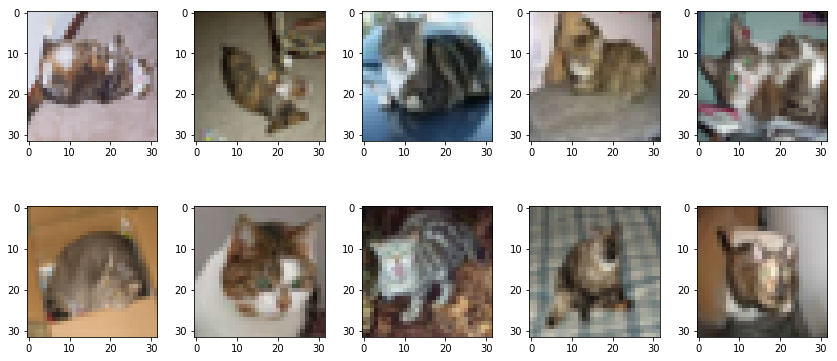

In [21]:
fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i, idx in enumerate(cat_cat[1][0]):
    a = np.asarray(cat.image_array.iloc[idx]).reshape(32, 32, 3)
    axs[i].imshow(a, interpolation='none')

In [22]:
np.mean(cat_dog[0][0][:5])

37.77071193352956

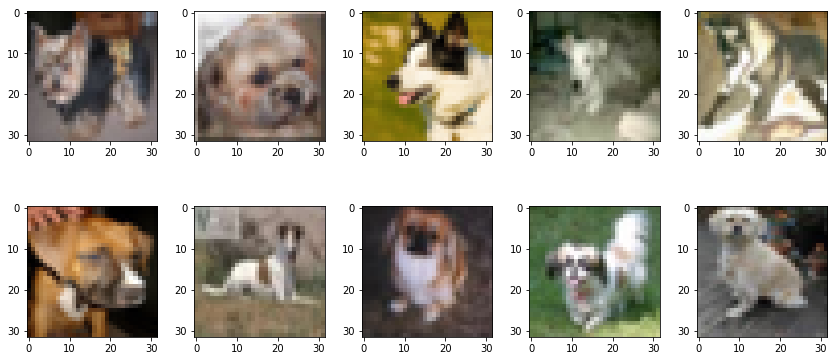

In [24]:
fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i, idx in enumerate(cat_dog[1][0]):
    a = np.asarray(dog.image_array.iloc[idx]).reshape(32, 32, 3)
    axs[i].imshow(a, interpolation='none')

In [25]:
dog_cat = cat_model.kneighbors(dog_features_test)
dog_dog = dog_model.kneighbors(dog_features_test)
dog_bird = bird_model.kneighbors(dog_features_test)
dog_automobile = automobile_model.kneighbors(dog_features_test)

d_dog_cat = np.asarray([x[0] for x in dog_cat[0]])
d_dog_dog = np.asarray([x[0] for x in dog_dog[0]])
d_dog_bird = np.asarray([x[0] for x in dog_bird[0]])
d_dog_automobile = np.asarray([x[0] for x in dog_automobile[0]])

In [26]:
bird_cat = cat_model.kneighbors(dog_features_test)
bird_dog = dog_model.kneighbors(dog_features_test)
bird_bird = bird_model.kneighbors(dog_features_test)
bird_automobile = automobile_model.kneighbors(dog_features_test)

d_bird_cat = np.asarray([x[0] for x in bird_cat[0]])
d_bird_dog = np.asarray([x[0] for x in bird_dog[0]])
d_bird_bird = np.asarray([x[0] for x in bird_bird[0]])
d_bird_automobile = np.asarray([x[0] for x in bird_automobile[0]])

In [27]:
automobile_cat = cat_model.kneighbors(dog_features_test)
automobile_dog = dog_model.kneighbors(dog_features_test)
automobile_bird = bird_model.kneighbors(dog_features_test)
automobile_automobile = automobile_model.kneighbors(dog_features_test)

d_automobile_cat = np.asarray([x[0] for x in automobile_cat[0]])
d_automobile_dog = np.asarray([x[0] for x in automobile_dog[0]])
d_automobile_bird = np.asarray([x[0] for x in automobile_bird[0]])
d_automobile_automobile = np.asarray([x[0] for x in automobile_automobile[0]])

In [28]:
dog_dist = pd.DataFrame({'dog-cat': d_dog_cat, 'dog-dog': d_dog_dog, 'dog-bird': d_dog_bird, 'dog-automobile': d_dog_automobile})
dog_dist['min'] = dog_dist.min(axis=1)
dog_dist['is_min'] = dog_dist['min'] == dog_dist['dog-dog']
dog_dist.is_min.sum() / len(dog_dist)

0.678

In [29]:
cat_dist = pd.DataFrame({'cat-cat': d_cat_cat, 'cat-dog': d_cat_dog, 'cat-bird': d_cat_bird, 'cat-automobile': d_cat_automobile})
cat_dist['min'] = cat_dist.min(axis=1)
cat_dist['is_min'] = cat_dist['min'] == cat_dist['cat-cat']
cat_dist.is_min.sum() / len(cat_dist)

0.548

In [30]:
bird_dist = pd.DataFrame({'bird-cat': d_bird_cat, 'bird-dog': d_bird_dog, 'bird-bird': d_bird_bird, 'bird-automobile': d_bird_automobile})
bird_dist['min'] = bird_dist.min(axis=1)
bird_dist['is_min'] = bird_dist['min'] == bird_dist['bird-bird']
bird_dist.is_min.sum() / len(bird_dist)

0.069

In [32]:
automobile_dist = pd.DataFrame({'automobile-cat': d_automobile_cat, 'automobile-dog': d_automobile_dog, 'automobile-bird': d_automobile_bird, 'automobile-automobile': d_automobile_automobile})
automobile_dist['min'] = automobile_dist.min(axis=1)
automobile_dist['is_min'] = automobile_dist['min'] == automobile_dist['automobile-automobile']
automobile_dist.is_min.sum() / len(automobile_dist)

0.005